*data visualisation notes * 
part 2: some simple clinical data from ....  in 3D 

Reminder :  essential reading: 
https://matplotlib.org/tutorials/introductory/usage.html

Which gives an excellent overview of the matplotlib OO environment



In [1]:
import os
import pandas as pd
import numpy as np
import ipywidgets as widgets

tt = os.getcwd()
print('this is your working directory - change if necessary using chdir: ',tt)
os.chdir('.\\walkingsignals\\walkingsignals')


this is your working directory - change if necssary using chdir:  C:\Users\telferm


In [10]:
%qtconsole

In [2]:
 
fn =  'miniDf.csv' # create in part 1 
miniDf = pd.read_csv(fn,header=0,na_values=['n/a','N/A ','na'])

# should have dataframe that is 77x30 
miniDf.shape

(77, 16)

get the data into shape 

Moving on to 3D plots - use the scaled version of the data attempting to predict fallers vs non-fallers .. need to use a new notepbook as the %matplotlib inline means we get static images rather than interactive.

Note \n can be put in title text to split it over 2 lines 

<IPython.core.display.Javascript object>


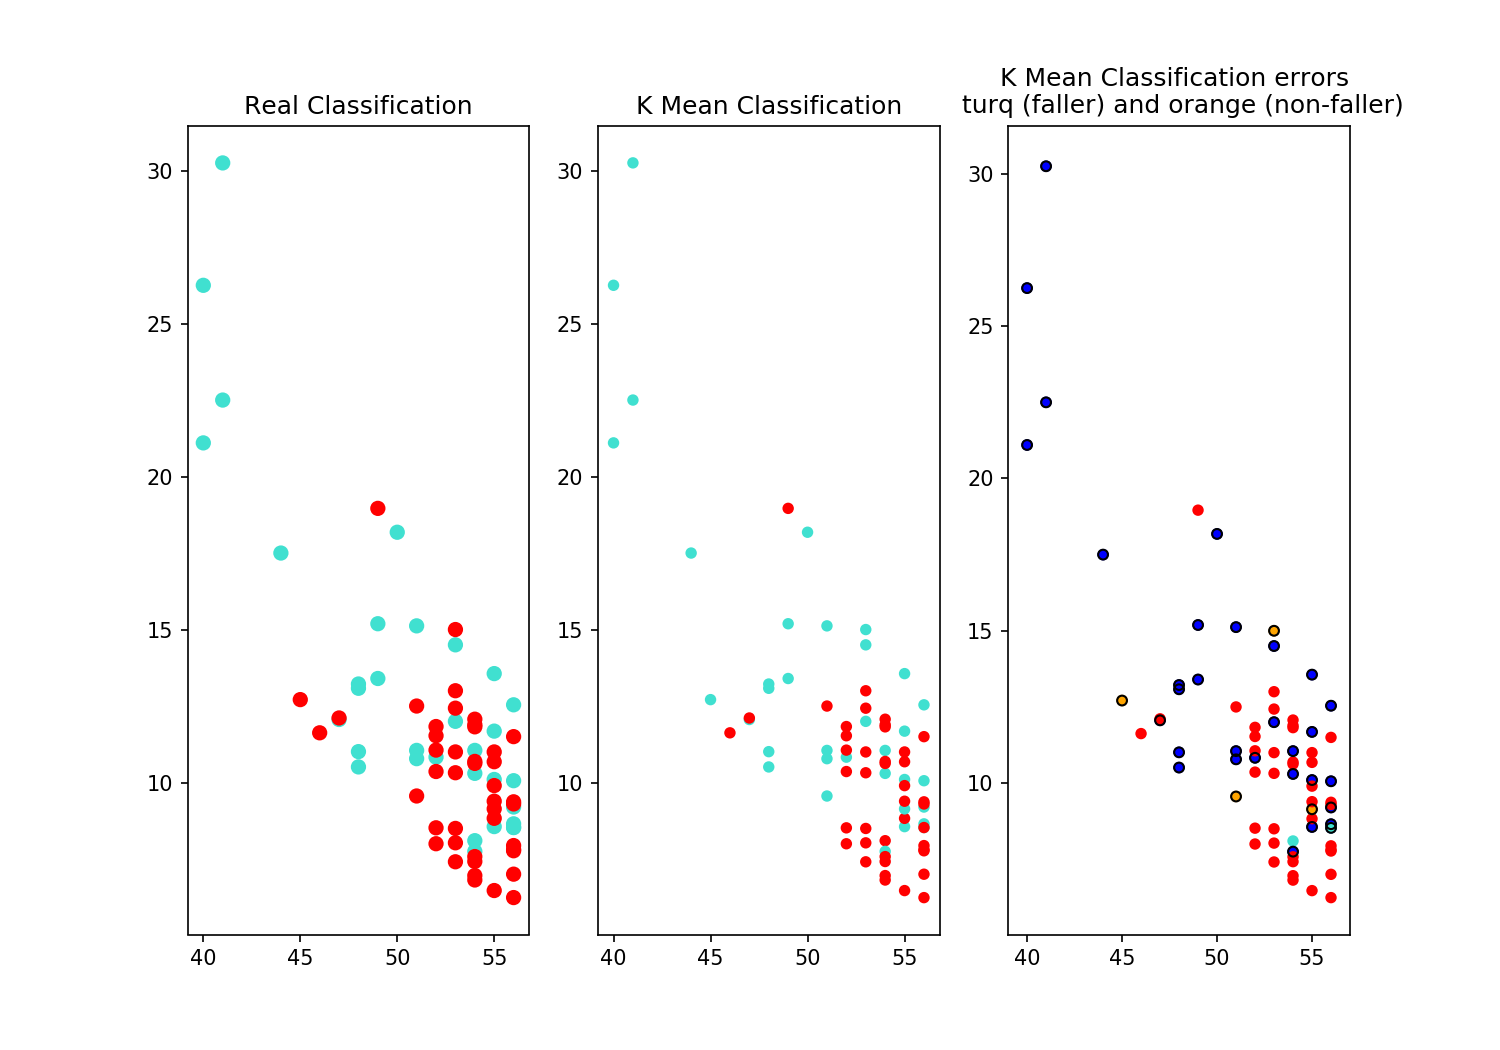

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
#%% perhaps kmeans will be prettier  http://stamfordresearch.com/k-means-clustering-in-python/
from sklearn.cluster import KMeans
import sklearn.metrics as sm
# give kmeans all the data except fallers and see what it does .. we want 2 nice clusters please 
model = KMeans(n_clusters=2)
y=miniDf.faller.values
y = y.astype(int)
x=miniDf.copy().drop('faller',axis=1)
model.fit(x)


model.labels_

# create array with mismatches  - make predictions 2/4 instead of 0/1
mism = (model.labels_)*2 + y
# now 2 = matched 0-0 (non-faller), 1 = mismatched faller, 2 = mismatched non-faller, 3 = matched faller
# by matched here, we mean prediction and truth match 
mism = mism.astype(int)

 
# Create a colormap
colormap = np.array(['red', 'turquoise','orange','blue']) # red and blue ok 
fig = plt.figure(figsize=(10,7)) 
# Plot the Original Classifications
ax1 =plt.subplot(1, 3, 1) # 1 row, 3 cols , this is the first plot 
plt.scatter(x.BERG, x.TUG, c=colormap[y], s=40)
plt.title('Real Classification')
 
# Plot the Models Classifications
ax2 = plt.subplot(1, 3, 2)
plt.scatter(x.BERG, x.TUG, c=colormap[model.labels_], s=20)
plt.title('K Mean Classification')
# Plot the Models Classifications
ax3 = plt.subplot(1, 3, 3)
plt.scatter(x.BERG, x.TUG, c=colormap[mism], s=20)
# replot the anomalies with a black edge - try with and without these .. set edgecolors 
edge='none'

edge='black'
plt.scatter(x.BERG[model.labels_==1], x.TUG[model.labels_==1], c='none',edgecolors=edge, s=22)
plt.scatter(x.BERG[model.labels_==2], x.TUG[model.labels_==2], c='none',edgecolors=edge, s=22)

plt.title('K Mean Classification errors \n turq (faller) and orange (non-faller)')


<IPython.core.display.Javascript object>


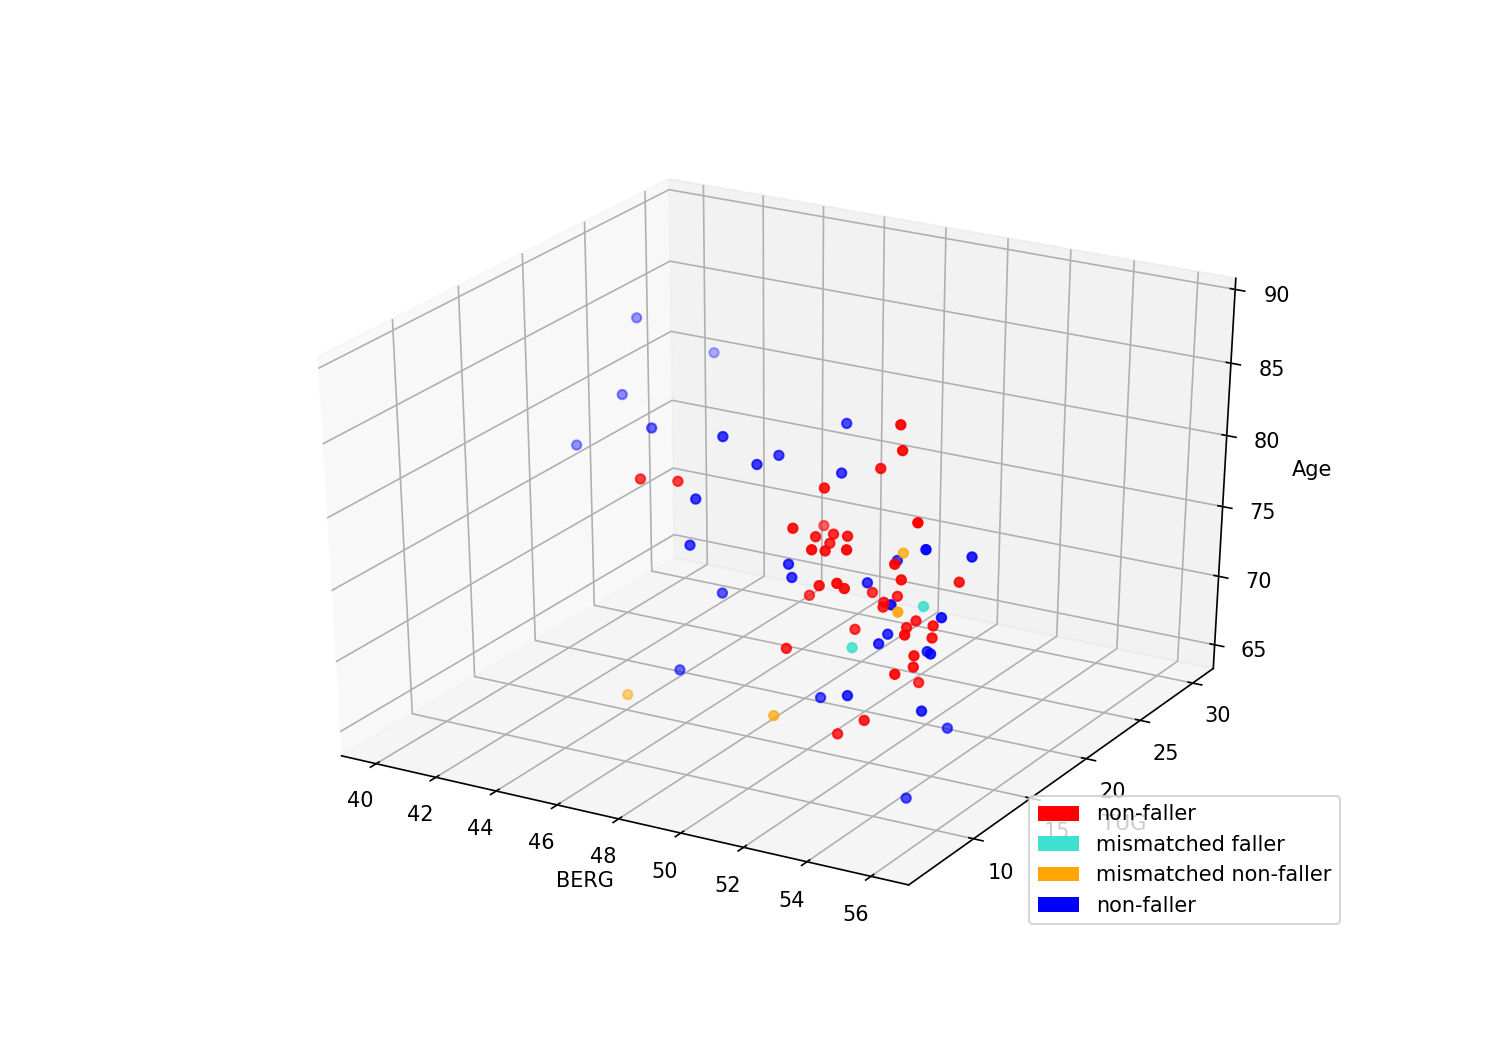

In [5]:

# lets plot them on 3d axes with age thrown in , just to get some 
# separation 
#%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,7)) # get a figure
ax = fig.add_subplot(111, projection='3d') # add some 3d axes 
#plt.xlim(0.5,1)
#plt.ylim(0.5,1) 
a = ax.scatter(x.BERG, x.TUG, x.Age, c=colormap[mism], s=20,label='all') 
# we seem to have a lot more purple than grey - can't rember what they are , so we'll add a legend 
# create legends 
# approach here is to create one plot for all points , regardless of colour. Alternative is to plot each colour
# separately ... then the legend becomes easier asyou can assign the label in the ax.scatter function


classes = ['non-faller','mismatched faller','mismatched non-faller', 'non-faller']

recs = []
legend = ax.legend(loc='upper center', shadow=True)
import matplotlib.patches as mpatches
for i in range(0,len(colormap)):
    recs.append(mpatches.Rectangle((0,0),1,1,fc=colormap[i])) # fc = facecolor
plt.legend(recs,classes,loc=4)
# add axis labels too:
plt.xlabel('BERG')  # like this   
ax.set_ylabel('TUG') # or this 
ax.set_zlabel('Age') 

# lets focus on the bottom right - there seemsto be a bug in matplotlib 3d at the moment 
#ax.set_xlim(0,1)
#ax.set_ylim(0,1) leave til later 

The outliers are obsuring the visua a bit here - could remove those in previous sheet ./ let me know  #
lets remove them now 

the BERG outliers are the same as the TUG - low score in balance and high score (timed task)  in movement 

In [11]:
print(miniDf.BERG.describe())
miniDf[miniDf.BERG< 45]
miniDf.TUG.describe()
miniDf[miniDf.TUG>20]

count    77.000000
mean     52.207792
std       3.991233
min      40.000000
25%      51.000000
50%      53.000000
75%      55.000000
max      56.000000
Name: BERG, dtype: float64


,Unnamed: 0,faller,ABC Tot %,Age,BERG,DGI,FAB,FSST,GDS,Gender,MMSE,SF-36,TUG,v_base,feet close eyes closed,tandem_eyes_closed
10,10,1,84.37,80.74,41,17,3.0,26.00,9.0,1.0,25.0,63.0,22.50,0.540,10.77,14.82
11,11,1,37.18,84.00,40,16,10.0,42.00,2.5,1.0,25.0,63.0,26.25,0.300,6.02,9.11
13,13,1,48.75,77.43,40,13,13.0,13.82,4.0,1.0,29.0,45.0,21.10,0.540,8.88,14.96
16,16,1,79.30,80.12,41,14,12.0,26.00,0.0,1.0,29.0,57.0,30.25,0.295,8.85,10.02


<IPython.core.display.Javascript object>


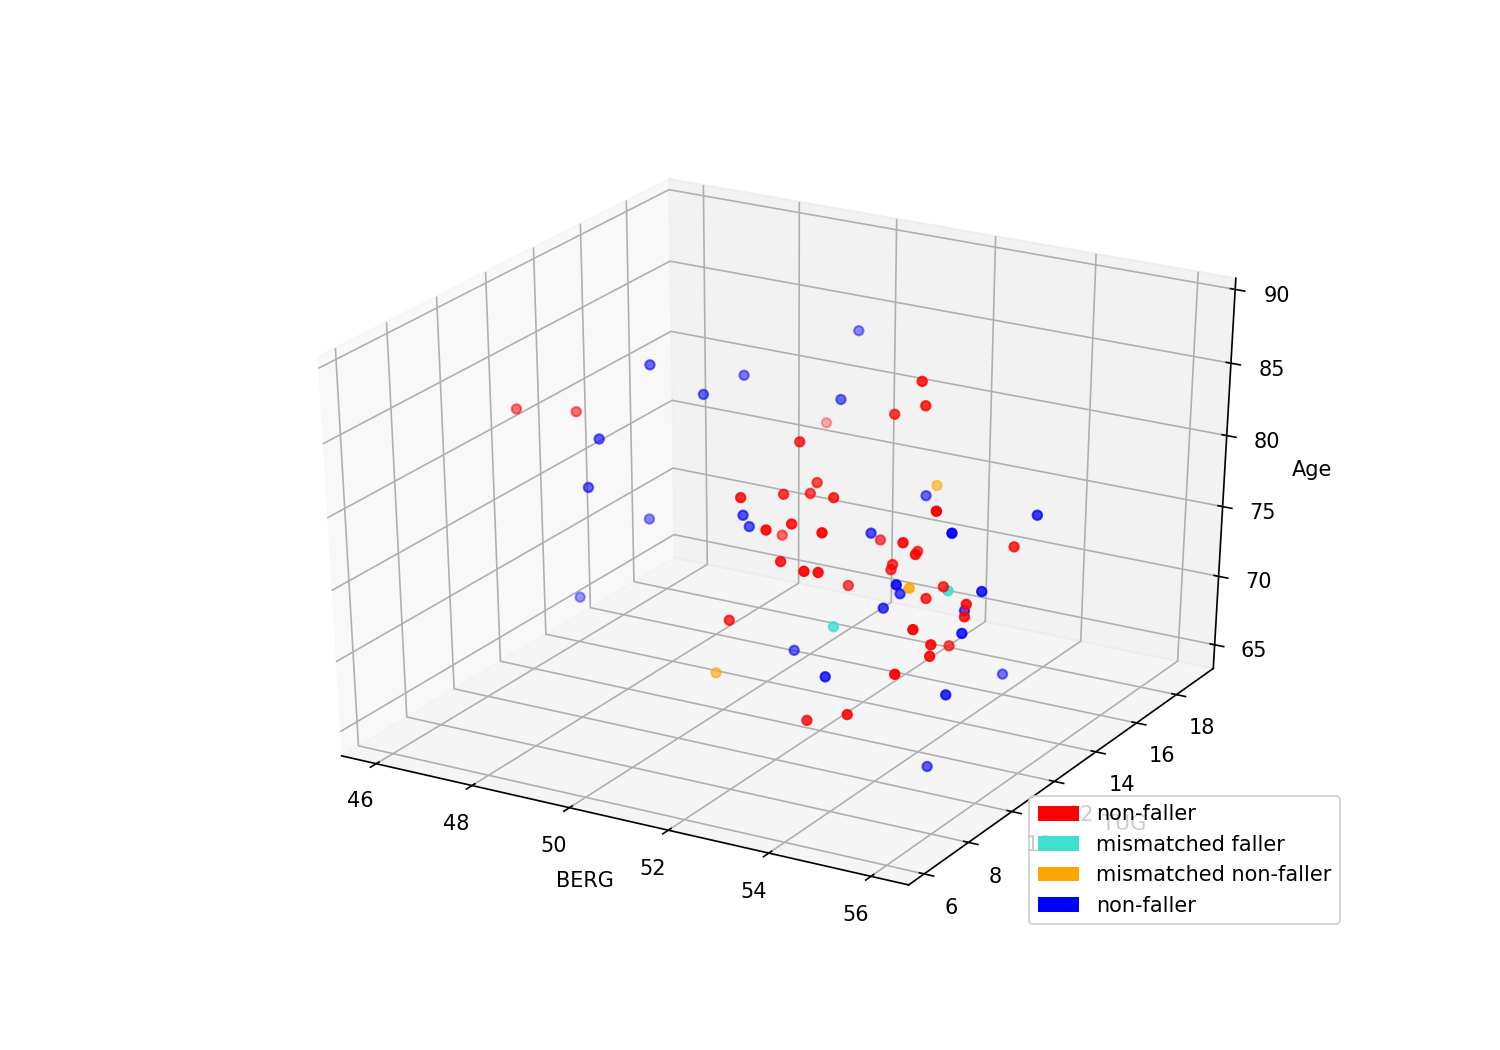

In [6]:
miniDf=miniDf[miniDf.BERG> 45]
#recalc kmeans etc 
model = KMeans(n_clusters=2)
x=miniDf.copy().drop('faller',axis=1)
model.fit(x)
y=miniDf.faller.values
y = y.astype(int)
# create array with mismatches  - make predictions 2/4 instead of 0/1
mism = (model.labels_)*2 + y 
mism = mism.astype(int)
fig = plt.figure(figsize=(10,7)) # get a figure - do not seem to be able to use figure from previous 
ax = fig.add_subplot(111, projection='3d') # add some 3d axes 

a = ax.scatter(x.BERG, x.TUG, x.Age, c=colormap[mism], s=20,label='all') 
#for i in range(0,len(colormap)):
#    recs.append(mpatches.Rectangle((0,0),1,1,fc=colormap[i])) # fc = facecolor
plt.legend(recs,classes,loc=4)
# add axis labels too:
plt.xlabel('BERG')  # like this   
ax.set_ylabel('TUG') # or this 
ax.set_zlabel('Age') 

perhaps the non-movement related SF-36 (wellbeing core) makes a difference ... lets size the dots relative to the SF-36
We need to add an extra legend , which we have to do manually .. see http://matplotlib.org/users/legend_guide.html#multiple-legends-on-the-same-axes


<IPython.core.display.Javascript object>


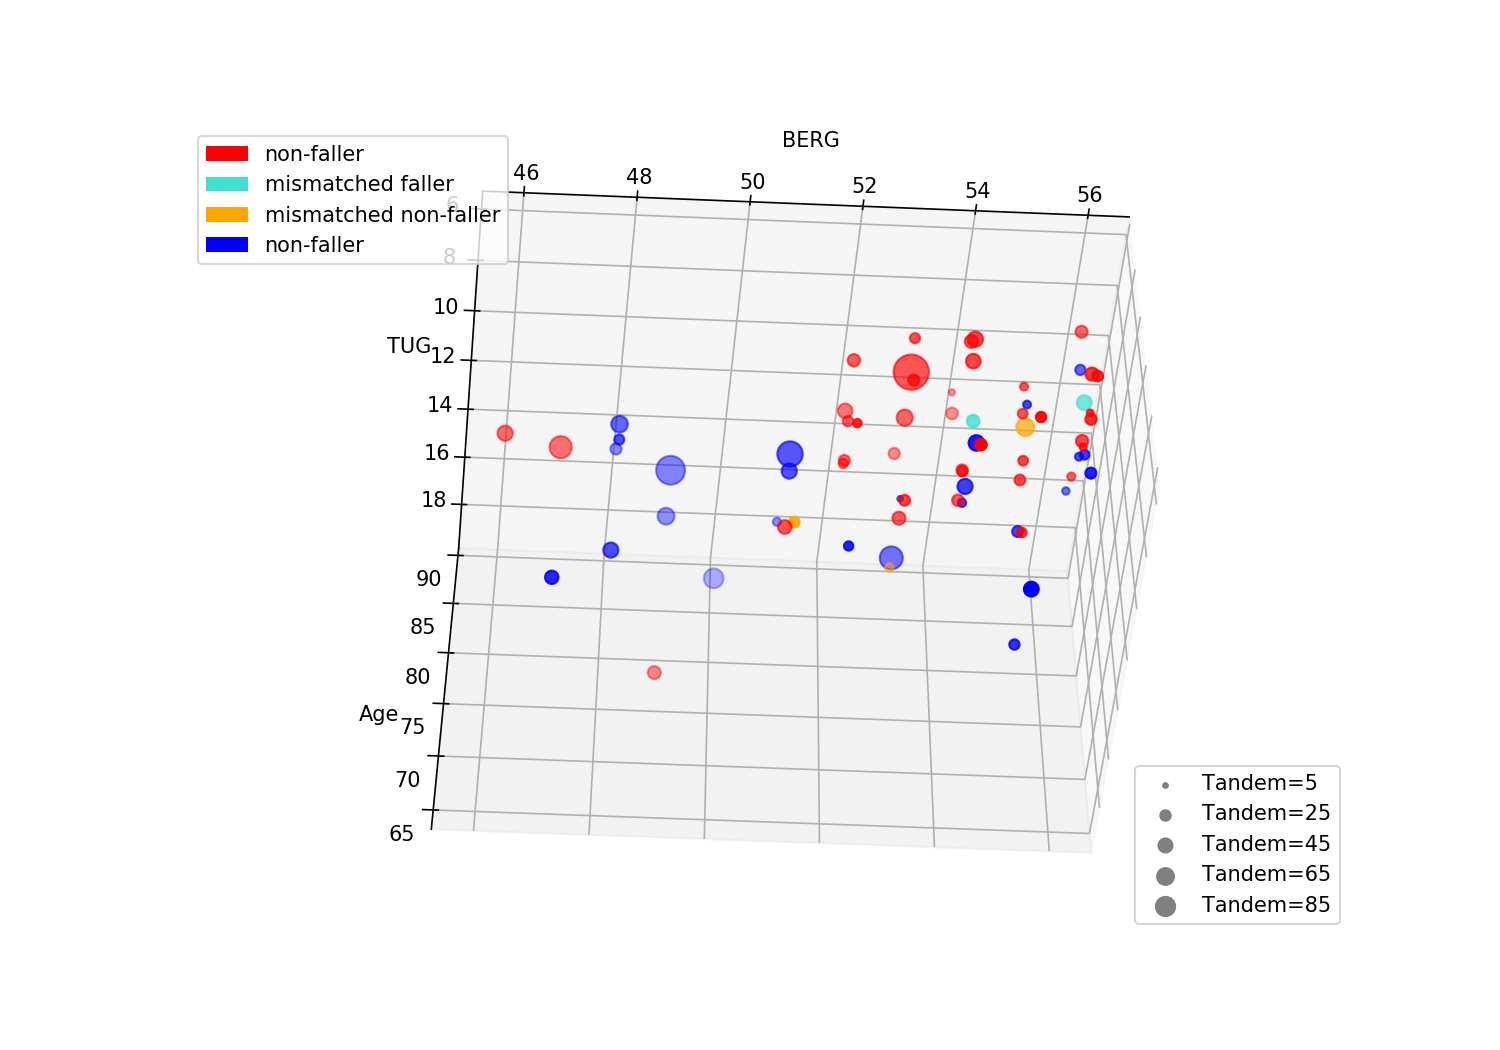

In [11]:
# all we have to do is use the SF-36 as the size papramet of each spot ...the difficult thing is the legend and formatting 

sizem = miniDf['tandem_eyes_closed']
scale=2


fig = plt.figure(figsize=(10,7)) # get a figure - do not seem to be able to use figure from previous 
ax = fig.add_subplot(111, projection='3d') # add some 3d axes 

a = ax.scatter(x.BERG, x.TUG, x.Age, c=colormap[mism], s=sizem*scale,label='all') 
#for i in range(0,len(colormap)):
#    recs.append(mpatches.Rectangle((0,0),1,1,fc=colormap[i])) # fc = facecolor
first_legend = plt.legend(recs,classes,loc=2)


# Add the legend manually to the current Axes.
plt.gca().add_artist(first_legend)
# add axis labels too:
plt.xlabel('BERG')  # like this   
ax.set_ylabel('TUG') # or this 
ax.set_zlabel('Age') 
sizes = np.arange(5, 90, 20) # note we have to buld the size range manually 
labels = ['Tandem={0}'.format(s) for s in sizes]
points = [ax.scatter([], [], [], s=s, c='gray') for s in sizes]
plt.legend(points, labels, scatterpoints=1,loc=4)